In [58]:
import xarray as xa
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pylibs.plot_utils import set_size, setupax_2dmap

In [59]:
obsfile = '/glade/derecho/scratch/swei/data_process_tmp/pace_spexone/PACE_SPEXONE.20241105T071541.L2.AER_RTAPLAND.V3_0.NRT.nc'
pltgrp = 'geophysical_data'
pltvar = 'aot'
pltch = 7
proj = ccrs.PlateCarree()

In [60]:
meta_ds = xa.open_dataset(obsfile, group='geolocation_data')
band_param_ds = xa.open_dataset(obsfile, group='sensor_band_parameters')
lats = meta_ds.latitude.data
lons = meta_ds.longitude.data
data_ds = xa.open_dataset(obsfile, group=pltgrp)[pltvar]

In [61]:
pltdata = data_ds.sel({data_ds.dims[2]: pltch})

In [62]:
np.count_nonzero(~np.isnan(pltdata))

3297

In [63]:
area_corner = [lats.min()-1., lats.max()+1., lons.min()-1., lons.max()+1.]

/glade/u/apps/opt/conda/envs/npl-2025a/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1692: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  result = super().scatter(*args, **kwargs)


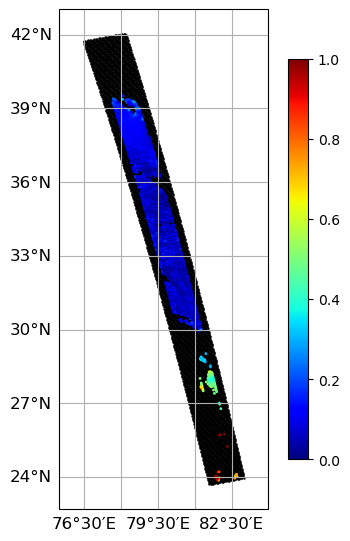

In [66]:
fig, ax, gl = setupax_2dmap(area_corner, None, proj, lbsize=12)
set_size(5,5)
ax.scatter(lons, lats, c='k', s=0.5, cmap='jet', vmin=0., vmax=1.)
sc = ax.scatter(lons, lats, c=pltdata, s=1, cmap='jet', vmin=0., vmax=1.)
plt.colorbar(sc, fraction=0.04, pad=0.04, aspect=20)

In [10]:
fig.savefig('pace_aod_test.png', dpi=300)

In [11]:
area_corner

[0.019588916, 27.976738, -41.63613, -12.511735]

In [13]:
a = np.str_

In [14]:
a.dtype

<attribute 'dtype' of 'numpy.generic' objects>